<a href="https://colab.research.google.com/github/HarshaVardhan2T02/EX-AI/blob/main/ex_ai_lab_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pda

df = pda.read_csv('/content/combined_dataset_labels.csv')
df.head()

,image_path,label
0,Combined Dataset/test/Mild Impairment/1 (10).jpg,1 (10).jpg
1,Combined Dataset/test/Mild Impairment/1 (11).jpg,1 (11).jpg
2,Combined Dataset/test/Mild Impairment/1 (14).jpg,1 (14).jpg
3,Combined Dataset/test/Mild Impairment/1 (15).jpg,1 (15).jpg
4,Combined Dataset/test/Mild Impairment/1 (2).jpg,1 (2).jpg


In [3]:
print("Shape of the DataFrame:")
print(df.shape)

print("\nData types of each column:")
df.info()

print("\nMissing values per column:")
print(df.isnull().sum())

Shape of the DataFrame:
(11519, 2)

Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11519 entries, 0 to 11518
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  11519 non-null  object
 1   label       11519 non-null  object
dtypes: object(2)
memory usage: 180.1+ KB

Missing values per column:
image_path    0
label         0
dtype: int64


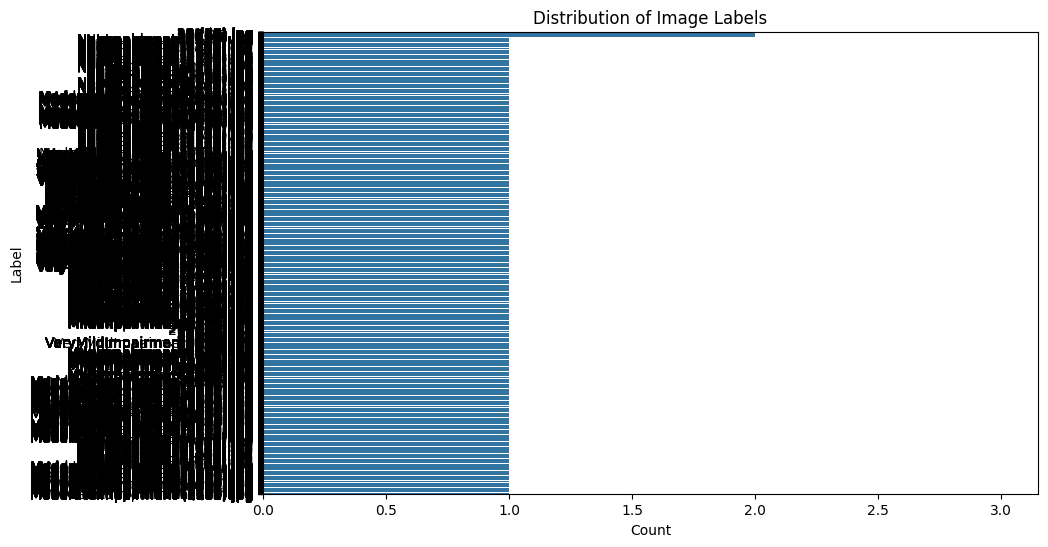

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate descriptive statistics for numerical columns
# Since there are no numerical columns, we will skip this step as it's not applicable.
# print("Descriptive statistics for numerical columns:")
# print(df.describe())

# Visualize the distribution of the 'label' column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='label', order=df['label'].value_counts().index)
plt.title('Distribution of Image Labels')
plt.xlabel('Count')
plt.ylabel('Label')
plt.show()

In [5]:
label_counts = df['label'].value_counts()
print("Value counts of the 'label' column:")
print(label_counts)

Value counts of the 'label' column:
label
24 (17).jpg                      3
8 (18).jpg                       3
13 (27).jpg                      3
32 (20).jpg                      3
13 (14).jpg                      3
                                ..
ModerateImpairment (1184).jpg    1
ModerateImpairment (1185).jpg    1
ModerateImpairment (1186).jpg    1
ModerateImpairment (1187).jpg    1
ModerateImpairment (1178).jpg    1
Name: count, Length: 11359, dtype: int64


In [6]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

if numerical_cols:
    print("Numerical columns found:", numerical_cols)
else:
    print("No numerical columns found in the DataFrame.")


No numerical columns found in the DataFrame.


In [7]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
image_path    0
label         0
dtype: int64


In [8]:
from sklearn.model_selection import train_test_split

X = df['image_path']
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (9215,)
Shape of X_test: (2304,)


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Make predictions on the test set
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf_clf = rf_clf.predict(X_test)
y_pred_gb_clf = gb_clf.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Precision:", precision_score(y_test, y_pred_log_reg, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_log_reg, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_log_reg, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg))

# Evaluate Random Forest Classifier
print("\nRandom Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_clf))
print("Precision:", precision_score(y_test, y_pred_rf_clf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf_clf, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_rf_clf, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_clf))

# Evaluate Gradient Boosting Classifier
print("\nGradient Boosting Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb_clf))
print("Precision:", precision_score(y_test, y_pred_gb_clf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_gb_clf, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_gb_clf, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb_clf))

NameError: name 'log_reg' is not defined

In [10]:
import os

def extract_class(image_path):
    return os.path.basename(os.path.dirname(image_path))

df['class'] = df['image_path'].apply(extract_class)

print("DataFrame with new 'class' column:")
display(df.head())
print("\nValue counts of the new 'class' column:")
print(df['class'].value_counts())

DataFrame with new 'class' column:


,image_path,label,class
0,Combined Dataset/test/Mild Impairment/1 (10).jpg,1 (10).jpg,Mild Impairment
1,Combined Dataset/test/Mild Impairment/1 (11).jpg,1 (11).jpg,Mild Impairment
2,Combined Dataset/test/Mild Impairment/1 (14).jpg,1 (14).jpg,Mild Impairment
3,Combined Dataset/test/Mild Impairment/1 (15).jpg,1 (15).jpg,Mild Impairment
4,Combined Dataset/test/Mild Impairment/1 (2).jpg,1 (2).jpg,Mild Impairment



Value counts of the new 'class' column:
class
No Impairment           3200
Very Mild Impairment    3008
Mild Impairment         2739
Moderate Impairment     2572
Name: count, dtype: int64


**Reasoning**:
Split the DataFrame into training and testing sets using the extracted 'class' column as the target variable.



In [11]:
y = df['class']
X_train_df, X_test_df, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train_df:", X_train_df.shape)
print("Shape of X_test_df:", X_test_df.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_df: (9215, 3)
Shape of X_test_df: (2304, 3)
Shape of y_train: (9215,)
Shape of y_test: (2304,)


**Reasoning**:
Create image data generators for the training and testing sets using the image paths and class labels.



In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions
img_width, img_height = 128, 128
batch_size = 32

# Create ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators from DataFrame
train_generator = train_datagen.flow_from_dataframe(
    X_train_df,
    x_col='image_path',
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset=None,
    shuffle=True
)

test_generator = test_datagen.flow_from_dataframe(
    X_test_df,
    x_col='image_path',
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset=None,
    shuffle=False
)

print("\nTraining data generator created.")
print("Testing data generator created.")

Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.

Training data generator created.
Testing data generator created.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 9215 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2304 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


In [13]:
# Update the data generators to include the base directory
base_dir = '/content/'

train_generator = train_datagen.flow_from_dataframe(
    X_train_df,
    directory=base_dir,
    x_col='image_path',
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset=None,
    shuffle=True
)

test_generator = test_datagen.flow_from_dataframe(
    X_test_df,
    directory=base_dir,
    x_col='image_path',
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset=None,
    shuffle=False
)

print("\nUpdated training data generator created.")
print("Updated testing data generator created.")

Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.

Updated training data generator created.
Updated testing data generator created.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 9215 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2304 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


In [14]:
# Remove leading slash from image_path
X_train_df['image_path'] = X_train_df['image_path'].str.lstrip('/')
X_test_df['image_path'] = X_test_df['image_path'].str.lstrip('/')

# Create ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators from DataFrame
train_generator = train_datagen.flow_from_dataframe(
    X_train_df,
    directory=base_dir,
    x_col='image_path',
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset=None,
    shuffle=True
)

test_generator = test_datagen.flow_from_dataframe(
    X_test_df,
    directory=base_dir,
    x_col='image_path',
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset=None,
    shuffle=False
)

print("\nUpdated training data generator created.")
print("Updated testing data generator created.")

Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.

Updated training data generator created.
Updated testing data generator created.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 9215 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2304 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


In [15]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("First few rows of X_train_df['image_path'] after removing leading slash:")
print(X_train_df['image_path'].head())

print("\nFirst few rows of X_test_df['image_path'] after removing leading slash:")
print(X_test_df['image_path'].head())

# Verify base_dir
base_dir = '/content/'
print("\nBase directory set to:", base_dir)

# Recreate ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Recreate data generators from DataFrame
train_generator = train_datagen.flow_from_dataframe(
    X_train_df,
    directory=base_dir,
    x_col='image_path',
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_dataframe(
    X_test_df,
    directory=base_dir,
    x_col='image_path',
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

print(f"\nFound {train_generator.samples} images belonging to {train_generator.num_classes} classes in the training set.")
print(f"Found {test_generator.samples} images belonging to {test_generator.num_classes} classes in the testing set.")

First few rows of X_train_df['image_path'] after removing leading slash:
8426    Combined Dataset/train/No Impairment/NoImpairm...
1523    Combined Dataset/train/Mild Impairment/MildImp...
7583    Combined Dataset/train/No Impairment/NoImpairm...
2402    Combined Dataset/train/Mild Impairment/MildImp...
5895    Combined Dataset/train/Moderate Impairment/Mod...
Name: image_path, dtype: object

First few rows of X_test_df['image_path'] after removing leading slash:
4674     Combined Dataset/train/Moderate Impairment/Mod...
6711     Combined Dataset/train/No Impairment/NoImpairm...
2138     Combined Dataset/train/Mild Impairment/MildImp...
10779    Combined Dataset/train/Very Mild Impairment/Ve...
7336     Combined Dataset/train/No Impairment/NoImpairm...
Name: image_path, dtype: object

Base directory set to: /content/
Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 9215 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2304 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


AttributeError: 'DataFrameIterator' object has no attribute 'num_classes'

In [16]:
# Verify base_dir and image_paths again
base_dir = '/content/'
print("Base directory set to:", base_dir)
print("First few rows of X_train_df['image_path']:")
print(X_train_df['image_path'].head())

# Recreate ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Recreate data generators from DataFrame
train_generator = train_datagen.flow_from_dataframe(
    X_train_df,
    directory=base_dir,
    x_col='image_path',
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_dataframe(
    X_test_df,
    directory=base_dir,
    x_col='image_path',
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

print(f"\nFound {train_generator.samples} images in the training set.")
print(f"Found {test_generator.samples} images in the testing set.")

if train_generator.samples > 0:
    print(f"Belonging to {train_generator.num_classes} classes in the training set.")
if test_generator.samples > 0:
    print(f"Belonging to {test_generator.num_classes} classes in the testing set.")

Base directory set to: /content/
First few rows of X_train_df['image_path']:
8426    Combined Dataset/train/No Impairment/NoImpairm...
1523    Combined Dataset/train/Mild Impairment/MildImp...
7583    Combined Dataset/train/No Impairment/NoImpairm...
2402    Combined Dataset/train/Mild Impairment/MildImp...
5895    Combined Dataset/train/Moderate Impairment/Mod...
Name: image_path, dtype: object
Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.

Found 0 images in the training set.
Found 0 images in the testing set.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 9215 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2304 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


In [17]:
# Remove 'Combined Dataset/' from the beginning of image_path
X_train_df['image_path_relative'] = X_train_df['image_path'].str.replace('Combined Dataset/', '', regex=False)
X_test_df['image_path_relative'] = X_test_df['image_path'].str.replace('Combined Dataset/', '', regex=False)

print("First few rows of X_train_df['image_path_relative'] after modification:")
print(X_train_df['image_path_relative'].head())

print("\nFirst few rows of X_test_df['image_path_relative'] after modification:")
print(X_test_df['image_path_relative'].head())


# Set base_dir to the 'Combined Dataset' directory
base_dir = '/content/Combined Dataset/'
print("\nBase directory set to:", base_dir)

# Recreate ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Recreate data generators from DataFrame
train_generator = train_datagen.flow_from_dataframe(
    X_train_df,
    directory=base_dir,
    x_col='image_path_relative',
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_dataframe(
    X_test_df,
    directory=base_dir,
    x_col='image_path_relative',
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

print(f"\nFound {train_generator.samples} images in the training set.")
print(f"Found {test_generator.samples} images in the testing set.")

if train_generator.samples > 0:
    print(f"Belonging to {train_generator.num_classes} classes in the training set.")
if test_generator.samples > 0:
    print(f"Belonging to {test_generator.num_classes} classes in the testing set.")

First few rows of X_train_df['image_path_relative'] after modification:
8426           train/No Impairment/NoImpairment (519).jpg
1523      train/Mild Impairment/MildImpairment (1218).jpg
7583          train/No Impairment/NoImpairment (2064).jpg
2402      train/Mild Impairment/MildImpairment (2009).jpg
5895    train/Moderate Impairment/ModerateImpairment (...
Name: image_path_relative, dtype: object

First few rows of X_test_df['image_path_relative'] after modification:
4674     train/Moderate Impairment/ModerateImpairment (...
6711            train/No Impairment/NoImpairment (128).jpg
2138       train/Mild Impairment/MildImpairment (1772).jpg
10779    train/Very Mild Impairment/VeryMildImpairment ...
7336           train/No Impairment/NoImpairment (1842).jpg
Name: image_path_relative, dtype: object

Base directory set to: /content/Combined Dataset/
Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.

Found 0 images in the

/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 9215 invalid image filename(s) in x_col="image_path_relative". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2304 invalid image filename(s) in x_col="image_path_relative". These filename(s) will be ignored.
  warnings.warn(


In [18]:
# Use the original image_path (with leading slash removed) and set directory=None
# This assumes the paths in image_path are already the full paths
# from the root that flow_from_dataframe can access.

print("First few rows of X_train_df['image_path']:")
print(X_train_df['image_path'].head())

print("\nFirst few rows of X_test_df['image_path']:")
print(X_test_df['image_path'].head())


# Recreate ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Recreate data generators from DataFrame with directory=None
train_generator = train_datagen.flow_from_dataframe(
    X_train_df,
    directory=None,  # Set directory to None
    x_col='image_path',
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_dataframe(
    X_test_df,
    directory=None,  # Set directory to None
    x_col='image_path',
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

print(f"\nFound {train_generator.samples} images in the training set.")
print(f"Found {test_generator.samples} images in the testing set.")

if train_generator.samples > 0:
    print(f"Belonging to {train_generator.num_classes} classes in the training set.")
if test_generator.samples > 0:
    print(f"Belonging to {test_generator.num_classes} classes in the testing set.")

First few rows of X_train_df['image_path']:
8426    Combined Dataset/train/No Impairment/NoImpairm...
1523    Combined Dataset/train/Mild Impairment/MildImp...
7583    Combined Dataset/train/No Impairment/NoImpairm...
2402    Combined Dataset/train/Mild Impairment/MildImp...
5895    Combined Dataset/train/Moderate Impairment/Mod...
Name: image_path, dtype: object

First few rows of X_test_df['image_path']:
4674     Combined Dataset/train/Moderate Impairment/Mod...
6711     Combined Dataset/train/No Impairment/NoImpairm...
2138     Combined Dataset/train/Mild Impairment/MildImp...
10779    Combined Dataset/train/Very Mild Impairment/Ve...
7336     Combined Dataset/train/No Impairment/NoImpairm...
Name: image_path, dtype: object
Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.

Found 0 images in the training set.
Found 0 images in the testing set.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 9215 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2304 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


In [30]:
# Adjust image_path to be relative to '/content/'
# Check if the paths already start with '/content/' and remove it if they do.
# This is important because if the paths are already relative to /content,
# we don't want to remove /content/ again.

def make_path_relative_to_content(image_path):
    if image_path.startswith('/content/'):
        return image_path.replace('/content/', '', 1)
    return image_path

X_train_df['image_path_relative'] = X_train_df['image_path'].apply(make_path_relative_to_content)
X_test_df['image_path_relative'] = X_test_df['image_path'].apply(make_path_relative_to_content)


print("First few rows of X_train_df['image_path_relative']:")
print(X_train_df['image_path_relative'].head())

print("\nFirst few rows of X_test_df['image_path_relative']:")
print(X_test_df['image_path_relative'].head())


# Recreate ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Recreate data generators from DataFrame with directory='/content/' and relative paths
train_generator = train_datagen.flow_from_dataframe(
    X_train_df,
    directory='/content/',  # Set directory to the base path
    x_col='image_path_relative',  # Use the relative path column
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_dataframe(
    X_test_df,
    directory='/content/',  # Set directory to the base path
    x_col='image_path_relative',  # Use the relative path column
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

print(f"\nFound {train_generator.samples} images in the training set.")
print(f"Found {test_generator.samples} images in the testing set.")

if train_generator.samples > 0:
    print(f"Belonging to {train_generator.num_classes} classes in the training set.")
if test_generator.samples > 0:
    print(f"Belonging to {test_generator.num_classes} classes in the testing set.")

First few rows of X_train_df['image_path_relative']:
8426    Combined Dataset/train/No Impairment/NoImpairm...
1523    Combined Dataset/train/Mild Impairment/MildImp...
7583    Combined Dataset/train/No Impairment/NoImpairm...
2402    Combined Dataset/train/Mild Impairment/MildImp...
5895    Combined Dataset/train/Moderate Impairment/Mod...
Name: image_path_relative, dtype: object

First few rows of X_test_df['image_path_relative']:
4674     Combined Dataset/train/Moderate Impairment/Mod...
6711     Combined Dataset/train/No Impairment/NoImpairm...
2138     Combined Dataset/train/Mild Impairment/MildImp...
10779    Combined Dataset/train/Very Mild Impairment/Ve...
7336     Combined Dataset/train/No Impairment/NoImpairm...
Name: image_path_relative, dtype: object
Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.

Found 0 images in the training set.
Found 0 images in the testing set.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 9215 invalid image filename(s) in x_col="image_path_relative". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2304 invalid image filename(s) in x_col="image_path_relative". These filename(s) will be ignored.
  warnings.warn(


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16

# Determine the number of output classes
num_classes = len(train_generator.class_indices)
print(f"Number of output classes: {num_classes}")

# Load the pre-trained VGG16 model without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Number of output classes: 0
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 0)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,096 (64.13 MB)

 Trainable params: 2,097,408 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16

# Determine the number of output classes directly from the dataframe
num_classes = df['class'].nunique()
print(f"Number of output classes: {num_classes}")

# Load the pre-trained VGG16 model without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Number of output classes: 4


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,813,124 (64.14 MB)

 Trainable params: 2,098,436 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [23]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Verify the structure of the image_path and the existence of files
print("Checking existence of a few image paths from X_train_df:")
for i, path in enumerate(X_train_df['image_path'].head()):
    full_path = os.path.join('/content/', path)
    print(f"Path: {full_path}, Exists: {os.path.exists(full_path)}")
    if i > 5: # Check only a few paths
        break

print("\nChecking existence of a few image paths from X_test_df:")
for i, path in enumerate(X_test_df['image_path'].head()):
    full_path = os.path.join('/content/', path)
    print(f"Path: {full_path}, Exists: {os.path.exists(full_path)}")
    if i > 5: # Check only a few paths
        break

# Recreate ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Recreate data generators from DataFrame with directory='/content/'
# and using the original 'image_path' column which seems to contain paths
# relative to the /content/ directory.
train_generator = train_datagen.flow_from_dataframe(
    X_train_df,
    directory='/content/',  # Base directory for the image paths
    x_col='image_path',     # Column containing the image file paths
    y_col='class',          # Column containing the class labels
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_dataframe(
    X_test_df,
    directory='/content/',
    x_col='image_path',
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

print(f"\nFound {train_generator.samples} images in the training set.")
print(f"Found {test_generator.samples} images in the testing set.")

if train_generator.samples > 0:
    print(f"Belonging to {train_generator.num_classes} classes in the training set.")
if test_generator.samples > 0:
    print(f"Belonging to {test_generator.num_classes} classes in the testing set.")

Checking existence of a few image paths from X_train_df:
Path: /content/Combined Dataset/train/No Impairment/NoImpairment (519).jpg, Exists: False
Path: /content/Combined Dataset/train/Mild Impairment/MildImpairment (1218).jpg, Exists: False
Path: /content/Combined Dataset/train/No Impairment/NoImpairment (2064).jpg, Exists: False
Path: /content/Combined Dataset/train/Mild Impairment/MildImpairment (2009).jpg, Exists: False
Path: /content/Combined Dataset/train/Moderate Impairment/ModerateImpairment (545).jpg, Exists: False

Checking existence of a few image paths from X_test_df:
Path: /content/Combined Dataset/train/Moderate Impairment/ModerateImpairment (1750).jpg, Exists: False
Path: /content/Combined Dataset/train/No Impairment/NoImpairment (128).jpg, Exists: False
Path: /content/Combined Dataset/train/Mild Impairment/MildImpairment (1772).jpg, Exists: False
Path: /content/Combined Dataset/train/Very Mild Impairment/VeryMildImpairment (332).jpg, Exists: False
Path: /content/Combine

/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 9215 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2304 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


In [31]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a new column with absolute paths
X_train_df['image_path_absolute'] = X_train_df['image_path'].apply(lambda x: os.path.join('/content/', x))
X_test_df['image_path_absolute'] = X_test_df['image_path'].apply(lambda x: os.path.join('/content/', x))


print("First few rows of X_train_df['image_path_absolute']:")
print(X_train_df['image_path_absolute'].head())

print("\nFirst few rows of X_test_df['image_path_absolute']:")
print(X_test_df['image_path_absolute'].head())


# Recreate ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Recreate data generators from DataFrame with directory=None and absolute paths
train_generator = train_datagen.flow_from_dataframe(
    X_train_df,
    directory=None,  # Set directory to None
    x_col='image_path_absolute', # Use the absolute path column
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_dataframe(
    X_test_df,
    directory=None,  # Set directory to None
    x_col='image_path_absolute', # Use the absolute path column
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

print(f"\nFound {train_generator.samples} images in the training set.")
print(f"Found {test_generator.samples} images in the testing set.")

if train_generator.samples > 0:
    print(f"Belonging to {train_generator.num_classes} classes in the training set.")
if test_generator.samples > 0:
    print(f"Belonging to {test_generator.num_classes} classes in the testing set.")

First few rows of X_train_df['image_path_absolute']:
8426    /content/Combined Dataset/train/No Impairment/...
1523    /content/Combined Dataset/train/Mild Impairmen...
7583    /content/Combined Dataset/train/No Impairment/...
2402    /content/Combined Dataset/train/Mild Impairmen...
5895    /content/Combined Dataset/train/Moderate Impai...
Name: image_path_absolute, dtype: object

First few rows of X_test_df['image_path_absolute']:
4674     /content/Combined Dataset/train/Moderate Impai...
6711     /content/Combined Dataset/train/No Impairment/...
2138     /content/Combined Dataset/train/Mild Impairmen...
10779    /content/Combined Dataset/train/Very Mild Impa...
7336     /content/Combined Dataset/train/No Impairment/...
Name: image_path_absolute, dtype: object
Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.

Found 0 images in the training set.
Found 0 images in the testing set.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 9215 invalid image filename(s) in x_col="image_path_absolute". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2304 invalid image filename(s) in x_col="image_path_absolute". These filename(s) will be ignored.
  warnings.warn(


In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Recreate ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Recreate data generators from DataFrame with directory='/content/' and relative paths
train_generator = train_datagen.flow_from_dataframe(
    X_train_df,
    directory='/content/',  # Set directory to the base path
    x_col='image_path_relative',  # Use the relative path column
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_dataframe(
    X_test_df,
    directory='/content/',  # Set directory to the base path
    x_col='image_path_relative',  # Use the relative path column
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

print(f"\nFound {train_generator.samples} images in the training set.")
print(f"Found {test_generator.samples} images in the testing set.")

if test_generator.samples > 0:
    print(f"Belonging to {test_generator.num_classes} classes in the testing set.")

    # Evaluate the model
    print("\nEvaluating the model on the test set...")
    evaluation_results = model.evaluate(
        test_generator,
        steps=test_generator.samples // batch_size
    )

    # Print the evaluation results
    print("\nTest Loss:", evaluation_results[0])
    print("Test Accuracy:", evaluation_results[1])
else:
    print("\nNo images found in the test generator. Cannot perform evaluation.")

Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.

Found 0 images in the training set.
Found 0 images in the testing set.

No images found in the test generator. Cannot perform evaluation.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 9215 invalid image filename(s) in x_col="image_path_relative". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2304 invalid image filename(s) in x_col="image_path_relative". These filename(s) will be ignored.
  warnings.warn(
